# Criterion:

Identify timestamps per video that satisfy:

Video:

1. At least one face of 400-500 px size

2. Facial Movement that indicates speaking

Audio:

1. Voice detected

2. Only one simultaneous speaker, or clearly audible speaker

In [1]:
from retinaface import RetinaFace
import cv2
import os
from matplotlib import pyplot as plt

In [29]:
class Video_Custom:
    
    def __init__(self, filepath):
        self.filepath = filepath
    
    def get_frame_original_fps(self, num):
        cap = cv2.VideoCapture(self.filepath)
        
        cap.set(cv2.CAP_PROP_POS_FRAMES, num)
        
        # Read the frame
        ret, frame = cap.read()
        cap.release()
        
        return frame
    
    
    def split_frames(self, fps = 10):
        
        cap = cv2.VideoCapture(self.filepath)
        frames = []
        frame_rate = cap.get(cv2.CAP_PROP_FPS) 
        interval = int(frame_rate / 10)  

        current_frame = 0
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break 

            if current_frame % interval == 0:
                frames.append(frame)

            current_frame += 1
            
        self.frames = frames;

        cap.release()  
    
    def get_all_split_frames(self):
        return self.frames
    
    def get_frame(self, num):
        return self.get_frame_original_fps(num)
    
    def display_frame(self, num):
        frame_to_display = self.get_frame_original_fps(num)
        
        frame_to_display_rgb = cv2.cvtColor(frame_to_display, cv2.COLOR_BGR2RGB)

        plt.imshow(frame_to_display_rgb)
        plt.title('Frame ' + str(num))
        plt.axis('off') 
        plt.show()

In [30]:
test = Video_Custom('vid_test.mp4')

In [31]:
test.split_frames()

KeyboardInterrupt: 

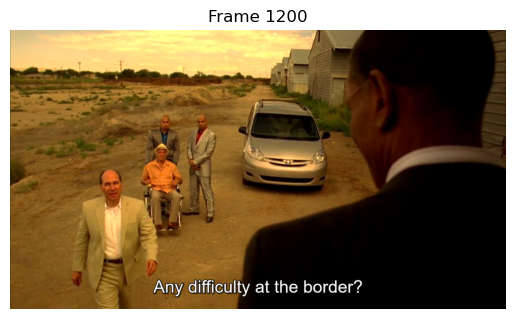

In [32]:
test.display_frame(1200)

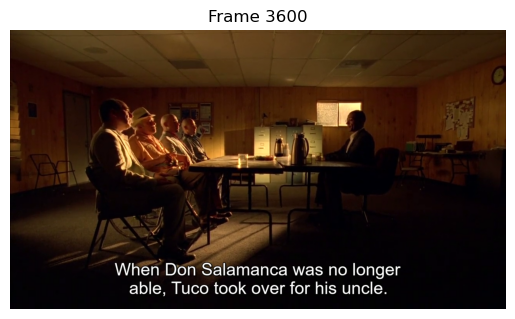

In [33]:
test.display_frame(3600)

In [34]:
def custom_face_detect(frame, plot = True):
    
    def save_temp_frame(frame, filename="temp_frame.jpg"):
        cv2.imwrite(filename, frame)
        return filename

    temp_filename = save_temp_frame(frame)

    
    resp = RetinaFace.detect_faces(temp_filename)

    
    if plot:
        
        image_path = temp_filename
        img = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        faces = resp

        fig, ax = plt.subplots()
        ax.imshow(img_rgb)

        for face in faces.values():
            x1, y1, x2, y2 = face['facial_area']
            rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, color='green', linewidth=2)
            ax.add_patch(rect)


            for landmark, point in face['landmarks'].items():
                ax.plot(point[0], point[1], marker='o', markersize=1, color='blue')

        ax.axis('off')  
        plt.show()
        
    if os.path.exists(temp_filename):
         os.remove(temp_filename)
    
    return resp

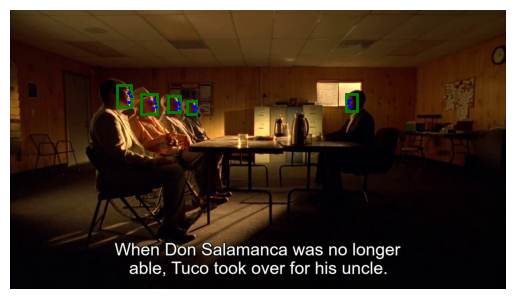

In [35]:
resp_1200 = custom_face_detect(test.get_frame(3600))

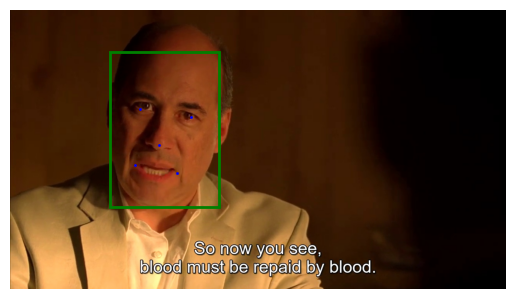

{'face_1': {'score': 0.998814582824707,
  'facial_area': [258, 109, 539, 507],
  'landmarks': {'right_eye': [334.2615, 253.81467],
   'left_eye': [466.30975, 275.61966],
   'nose': [383.28394, 346.68793],
   'mouth_right': [321.98703, 400.2654],
   'mouth_left': [429.21634, 418.98703]}}}

In [36]:
resp_1400 = custom_face_detect(test.get_frame(4200))
resp_1400

In [37]:
def filter_faces(resp, min_size):
    filtered_dict = {key: value for key, value in resp.items() if (value['facial_area'][2] - value['facial_area'][0]) * (value['facial_area'][3] - value['facial_area'][1]) > min_size}
    return filtered_dict

In [56]:
from moviepy.editor import *
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import ShortTermFeatures
from pyAudioAnalysis import audioSegmentation as aS
import matplotlib.pyplot as plt

class Audio_Custom:
    
    def extract_audio(vid_filepath):
        video = VideoFileClip(vid_filepath)
        audio = video.audio

        save_path = "vid_test.wav"

        audio.write_audiofile(save_path)
        return save_path
    
    def __init__(self, filepath):
        self.filepath = filepath
    
    def extract_segments(self, smooth_window  = 2.0, min_length = 3.0):
        [Fs, x] = audioBasicIO.read_audio_file(self.filepath)

        segments = aS.silence_removal(x, Fs, 0.020, 0.020, smooth_window=smooth_window, weight=0.3, plot=True)
        
        filtered_segments = [(s[1] - s[0], s) for s in segments if (s[1] - s[0]) >= min_length]

        return filtered_segments

In [57]:
wav = Audio_Custom.extract_audio('vid_test.mp4')

MoviePy - Writing audio in vid_test.wav


MoviePy - Done.


In [58]:
test_audio = Audio_Custom(wav)

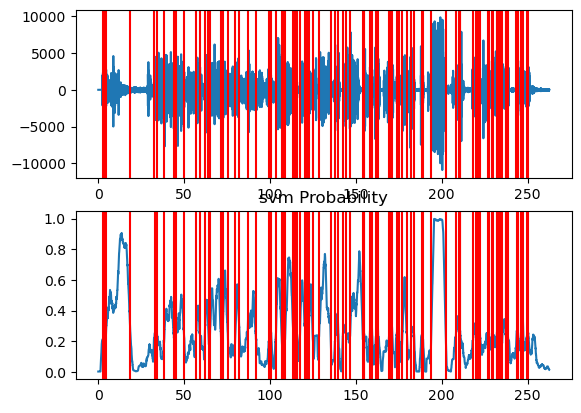

In [93]:
speech_segments = test_audio.extract_segments()

# Unification

In [25]:
frames_length = len(test.get_all_frames())

In [34]:
good_frames = []

for i in range(frames_length):
    if (i % 10 == 0) :
        print(i)
    resp = custom_face_detect(test.get_frame(i), plot = False);
    resp = filter_faces(resp, 400);
    if len(resp) > 1:
        good_frames.append(i);

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400


KeyboardInterrupt: 

In [5]:
results = detect_same_shots(test.get_all_frames())

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
2

In [9]:
from scenedetect import detect, AdaptiveDetector, split_video_ffmpeg
scene_list = detect('vid_test.mp4', AdaptiveDetector())
scene_list

[(00:00:00.000 [frame=0, fps=30.000], 00:00:06.233 [frame=187, fps=30.000]),
 (00:00:06.233 [frame=187, fps=30.000], 00:00:19.133 [frame=574, fps=30.000]),
 (00:00:19.133 [frame=574, fps=30.000], 00:00:21.633 [frame=649, fps=30.000]),
 (00:00:21.633 [frame=649, fps=30.000], 00:00:25.000 [frame=750, fps=30.000]),
 (00:00:25.000 [frame=750, fps=30.000], 00:00:28.567 [frame=857, fps=30.000]),
 (00:00:28.567 [frame=857, fps=30.000], 00:00:38.267 [frame=1148, fps=30.000]),
 (00:00:38.267 [frame=1148, fps=30.000],
  00:00:44.867 [frame=1346, fps=30.000]),
 (00:00:44.867 [frame=1346, fps=30.000],
  00:00:51.367 [frame=1541, fps=30.000]),
 (00:00:51.367 [frame=1541, fps=30.000],
  00:00:58.300 [frame=1749, fps=30.000]),
 (00:00:58.300 [frame=1749, fps=30.000],
  00:01:04.633 [frame=1939, fps=30.000]),
 (00:01:04.633 [frame=1939, fps=30.000],
  00:01:14.600 [frame=2238, fps=30.000]),
 (00:01:14.600 [frame=2238, fps=30.000],
  00:01:19.600 [frame=2388, fps=30.000]),
 (00:01:19.600 [frame=2388, f

0


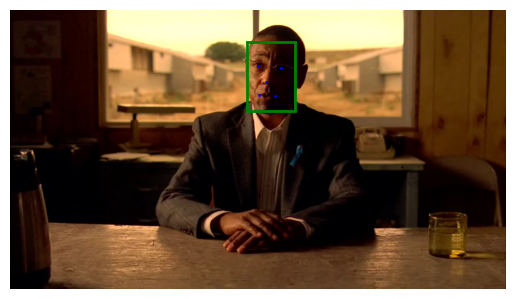

{'face_1': {'score': 0.9996888637542725, 'facial_area': [611, 81, 736, 259], 'landmarks': {'right_eye': [639.86334, 143.71443], 'left_eye': [698.29144, 147.90396], 'nose': [660.4875, 185.42973], 'mouth_right': [641.1694, 218.05978], 'mouth_left': [682.2559, 221.86018]}}}


In [86]:
for i, (start, end) in enumerate(scene_list[32:33]): # a prime example!!!

    frame_number = start.get_frames()  # Extracting the frame number

    if i % 10 == 0:
        print(i)

    # Assuming you have a function `get_frame(frame_number)` that returns the frame at `frame_number`
    frame = test.get_frame(frame_number)
    resp = custom_face_detect(frame, plot=True)
    resp = filter_faces(resp, 10000)
    
    print(resp)

0


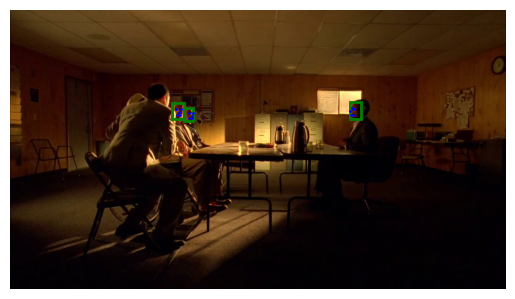

{}


In [88]:
for i, (start, end) in enumerate(scene_list[38:39]): # a bad example!!!

    frame_number = start.get_frames()

    if i % 10 == 0:
        print(i)

    frame = test.get_frame(frame_number)
    resp = custom_face_detect(frame, plot=True)
    resp = filter_faces(resp, 10000)
    
    print(resp)

In [90]:
good_shots = []
for i, (start, end) in enumerate(scene_list):
    frame_number = start.get_frames() 

    if i % 10 == 0:
        print(i)

    frame = test.get_frame(frame_number)
    resp = custom_face_detect(frame, plot=False)
    resp = filter_faces(resp, 10000)

    if len(resp) > 0:
        good_shots.append((start.get_seconds(), end.get_seconds())) 
good_shots

0
10
20
30
40


[(25.0, 28.566666666666666),
 (44.86666666666667, 51.36666666666667),
 (64.63333333333334, 74.6),
 (74.6, 79.6),
 (79.6, 82.46666666666667),
 (82.46666666666667, 92.0),
 (97.16666666666667, 100.73333333333333),
 (100.73333333333333, 106.66666666666667),
 (106.66666666666667, 109.33333333333333),
 (109.33333333333333, 113.6),
 (122.3, 133.6),
 (133.6, 136.56666666666666),
 (136.56666666666666, 142.3),
 (142.3, 146.03333333333333),
 (146.03333333333333, 148.83333333333334),
 (148.83333333333334, 150.8),
 (150.8, 153.26666666666668),
 (153.26666666666668, 155.96666666666667),
 (164.63333333333333, 170.9),
 (170.9, 177.3),
 (177.3, 183.63333333333333),
 (183.63333333333333, 186.16666666666666),
 (186.16666666666666, 189.8),
 (189.8, 194.3),
 (194.3, 196.43333333333334),
 (234.7, 240.46666666666667),
 (240.46666666666667, 242.63333333333333),
 (242.63333333333333, 245.6),
 (248.9, 253.53333333333333),
 (253.53333333333333, 256.73333333333335),
 (256.73333333333335, 259.23333333333335),
 (25

In [94]:
def find_range_intersections(list1, list2):
    list1.sort(key=lambda x: x[0])
    list2.sort(key=lambda x: x[0])
    
    i, j = 0, 0
    intersections = []
    
    while i < len(list1) and j < len(list2):
        start_max = max(list1[i][0], list2[j][0])
        end_min = min(list1[i][1], list2[j][1])
        
        if start_max <= end_min:
            intersections.append((start_max, end_min))
        
        if list1[i][1] < list2[j][1]:
            i += 1
        else:
            j += 1
    
    return intersections


intersections = find_range_intersections(good_shots, [i[1] for i in speech_segments])
print(intersections)


[(45.12, 49.88), (65.02, 71.4), (72.38, 74.6), (74.6, 75.44), (86.96000000000001, 91.7), (103.44, 106.66666666666667), (106.66666666666667, 106.74000000000001), (108.82000000000001, 109.33333333333333), (109.33333333333333, 113.5), (128.58, 133.6), (133.6, 135.24), (146.64000000000001, 148.83333333333334), (148.83333333333334, 150.8), (150.8, 153.26666666666668), (153.26666666666668, 153.98), (193.84, 194.3), (194.3, 196.43333333333334)]


In [97]:
from moviepy.editor import VideoFileClip
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip

def save_video_segments_with_audio(video_path, segments, output_folder):
    video = VideoFileClip(video_path)
    
    for i, (start, end) in enumerate(segments):
        output_path = f"{output_folder}/SUCCESS-{i}.mp4"
        ffmpeg_extract_subclip(video_path, start, end, targetname=output_path)


In [99]:
save_video_segments_with_audio('vid_test.mp4', intersections, 'success')

Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join

# Obsolete

In [22]:
from pydub import AudioSegment


full_audio = AudioSegment.from_wav('vid_test.wav')

min_duration_sec = 3

# Filter out segments shorter than 3 seconds and calculate durations
filtered_segments = [(s[1] - s[0], s) for s in segments if (s[1] - s[0]) >= 0]

# Sort the segments by duration, descending
sorted_filtered_segments = sorted(filtered_segments, key=lambda x: x[0], reverse=True)

num_segments_to_process = 15

# Initialize a list for validated segments
validated_segments = []

for duration, (start, end) in sorted_filtered_segments:
    # Adjust the start and end times to milliseconds and apply rounding
    start_ms = round(start * 1000, -1)  # Round to nearest 10 ms
    end_ms = round(end * 1000, -1)
    
    # Ensure segment is within audio bounds and has a valid duration
    if 0 <= start_ms < end_ms <= len(full_audio):
        segment_duration = (end_ms - start_ms) / 1000.0
        if segment_duration >= min_duration_sec:
            validated_segments.append((start, end))
            if len(validated_segments) == num_segments_to_process:
                break

# Proceed with extraction and saving of validated segments
for i, (start, end) in enumerate(validated_segments):
    start_ms = round(start * 1000, -1)
    end_ms = round(end * 1000, -1)
    segment_audio = full_audio[start_ms:end_ms]
    
    # Save the segment, already validated for duration and logical correctness
    try:
        segment_audio.export(f'longest_filtered_segment_{i+1}.wav', format='wav')
    except Exception as e:
        print(f"Error exporting segment {i+1}: {e}")



In [16]:
sorted_filtered_segments

[(14.880000000000003, [4.04, 18.92]),
 (7.899999999999977, [194.20000000000002, 202.1]),
 (4.659999999999997, [128.66, 133.32]),
 (3.920000000000016, [146.44, 150.36]),
 (3.8599999999999994, [109.58, 113.44]),
 (3.3400000000000034, [150.54, 153.88]),
 (3.260000000000005, [67.94, 71.2]),
 (3.1599999999999966, [103.36, 106.52]),
 (3.019999999999996, [40.7, 43.72]),
 (2.8999999999999986, [46.86, 49.76]),
 (2.6599999999999966, [117.48, 120.14]),
 (2.6400000000000006, [72.48, 75.12]),
 (2.5600000000000023, [56.9, 59.46]),
 (2.359999999999985, [208.08, 210.44]),
 (2.280000000000001, [177.18, 179.46]),
 (2.260000000000005, [89.14, 91.4]),
 (2.180000000000007, [79.92, 82.10000000000001]),
 (2.019999999999996, [122.68, 124.7]),
 (1.8799999999999955, [65.28, 67.16]),
 (1.8799999999999955, [235.46, 237.34]),
 (1.779999999999994, [62.300000000000004, 64.08]),
 (1.740000000000002, [38.56, 40.300000000000004]),
 (1.6599999999999966, [138.22, 139.88]),
 (1.6599999999999966, [246.0, 247.66]),
 (1.5200